In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=525100e3163230536c9e9b8dcd506e614d77e331aaf6fd8187f0c529ac7cfb20
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
!pip install pandas.plotting

ERROR: Could not find a version that satisfies the requirement pandas.plotting (from versions: none)
ERROR: No matching distribution found for pandas.plotting


In [ ]:
from pyspark.ml import Pipeline
from pyspark.sql.functions import when

In [ ]:
from pyspark.sql import functions as F

In [ ]:

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.sql.functions import expr


In [ ]:
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession, SQLContext

In [ ]:
import numpy as np


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.sql.functions import col
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
sqlCtx= SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("parquet_example").getOrCreate()

# Specify the path to the Parquet folder using a wildcard character
parquet_folder_path = '/content/drive/MyDrive/Colab Notebooks/output.parquet_def'

# Read the Parquet files into a DataFrame
df = spark.read.parquet(parquet_folder_path)

df.show()



+-------------------+--------------------+------+----+---------+--------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-------------------------------+---------------+----------------+---------------+-------------+-----------------+-------------+----------+----------+-------------+----------+----------+--------------------+---------------------------+---------------------------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Flight_Number_Operating_Airline|OriginAirportID|  OriginCityName|OriginStateName|DestAirportID|     DestCityName|DestStateName|DepTimeBlk|ArrTimeBlk|DistanceGroup|CRSDepTime|CRSArrTime|     scaled_Distance|scaled_CRSDepTime_InMinutes|scaled_CRSArrTime_InMinutes|
+-------------------+---

In [ ]:
# Count the number of True and False values in the column
count_true = df.filter(col("Cancelled") == True).count()
count_false = df.filter(col("Cancelled") == False).count()

print("Count of True values:", count_true)
print("Count of False values:", count_false)

Count of True values: 88373
Count of False values: 5601139


In [ ]:
df.count()

In [ ]:
# Count the number of True and False values in the column
count_true = df.filter(col("Diverted") == True).count()
count_false = df.filter(col("Diverted") == False).count()

print("Count of True values:", count_true)
print("Count of False values:", count_false)

Count of True values: 13955
Count of False values: 5675557


In [ ]:
df.printSchema()

root
 |-- FlightDate: timestamp_ntz (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Month: long (nullable = true)
 |-- DayofMonth: long (nullable = true)
 |-- DayOfWeek: long (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |-- Flight_Number_Marketing_Airline: long (nullable = true)
 |-- Operating_Airline: string (nullable = true)
 |-- Flight_Number_Operating_Airline: long (nullable = true)
 |-- OriginAirportID: long (nullable = true)
 |-- OriginCityName: string (nullable = true)
 |-- OriginStateName: string (nullable = true)
 |-- DestAirportID: long (nullable = true)
 |-- DestCityName: string (nullable = true)
 |-- DestStateName: string (nullable = true)
 |-- DepTimeBlk: string (nu

In [ ]:
# Replace boolean values with integers
df = df.withColumn("Cancelled", when(df["Cancelled"] == True, 1).otherwise(0))


df.show()

+-------------------+--------------------+------+----+---------+--------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-------------------------------+---------------+----------------+---------------+-------------+-----------------+-------------+----------+----------+-------------+----------+----------+--------------------+---------------------------+---------------------------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Flight_Number_Operating_Airline|OriginAirportID|  OriginCityName|OriginStateName|DestAirportID|     DestCityName|DestStateName|DepTimeBlk|ArrTimeBlk|DistanceGroup|CRSDepTime|CRSArrTime|     scaled_Distance|scaled_CRSDepTime_InMinutes|scaled_CRSArrTime_InMinutes|
+-------------------+---

In [ ]:
major_df = df.filter(col("Cancelled") == 0)
minor_df = df.filter(col("Cancelled") == 1)
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))

ratio: 63


In [ ]:
sampled_majority_df = major_df.sample(False, 1/ratio)
combined_df_2 = sampled_majority_df.unionAll(minor_df)
combined_df_2.show()

+-------------------+--------------------+------+----+---------+--------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-------------------------------+---------------+--------------------+---------------+-------------+--------------------+--------------+----------+----------+-------------+----------+----------+--------------------+---------------------------+---------------------------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Flight_Number_Operating_Airline|OriginAirportID|      OriginCityName|OriginStateName|DestAirportID|        DestCityName| DestStateName|DepTimeBlk|ArrTimeBlk|DistanceGroup|CRSDepTime|CRSArrTime|     scaled_Distance|scaled_CRSDepTime_InMinutes|scaled_CRSArrTime_InMinutes|
+-------

In [ ]:
combined_df_2.count()

176733

In [ ]:
df.show()

+-------------------+--------------------+------+----+---------+--------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-------------------------------+---------------+----------------+---------------+-------------+-----------------+-------------+----------+----------+-------------+----------+----------+--------------------+---------------------------+---------------------------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Flight_Number_Operating_Airline|OriginAirportID|  OriginCityName|OriginStateName|DestAirportID|     DestCityName|DestStateName|DepTimeBlk|ArrTimeBlk|DistanceGroup|CRSDepTime|CRSArrTime|     scaled_Distance|scaled_CRSDepTime_InMinutes|scaled_CRSArrTime_InMinutes|
+-------------------+---

In [ ]:
categorical_columns = ['Origin', 'Dest','DepTimeBlk', 'ArrTimeBlk', 'Airline']

# Create a list of StringIndexers for each categorical column
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_columns]

# Create a pipeline with the StringIndexers
pipeline = Pipeline(stages=indexers)

# Fit and transform the data using the pipeline
df_transformed = pipeline.fit(combined_df_2).transform(combined_df_2)


In [ ]:
df_transformed.show()

+-------------------+--------------------+------+----+---------+--------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-------------------------------+---------------+--------------------+---------------+-------------+--------------------+--------------+----------+----------+-------------+----------+----------+--------------------+---------------------------+---------------------------+------------+----------+----------------+----------------+-------------+
|         FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Flight_Number_Operating_Airline|OriginAirportID|      OriginCityName|OriginStateName|DestAirportID|        DestCityName| DestStateName|DepTimeBlk|ArrTimeBlk|DistanceGroup|CRSDepTime|CRSArrTime|     scaled_Di

In [ ]:
# Specify the columns to keep
selected_columns = [
    'Origin_index', 'Dest_index','Distance', 'Month', 'DayOfWeek', 'DayofMonth', 'DepTimeBlk_index',
    'ArrTimeBlk_index', 'Airline_index', 'scaled_CRSDepTime_InMinutes',
    'Flight_Number_Marketing_Airline', 'Cancelled'
]

# Filter and select the specified columns
filtered_dataframe = df_transformed.select(*[col(column) for column in selected_columns])

# Show the resulting DataFrame
filtered_dataframe.show()


+------------+----------+--------+-----+---------+----------+----------------+----------------+-------------+---------------------------+-------------------------------+---------+
|Origin_index|Dest_index|Distance|Month|DayOfWeek|DayofMonth|DepTimeBlk_index|ArrTimeBlk_index|Airline_index|scaled_CRSDepTime_InMinutes|Flight_Number_Marketing_Airline|Cancelled|
+------------+----------+--------+-----+---------+----------+----------------+----------------+-------------+---------------------------+-------------------------------+---------+
|        16.0|       3.0|   666.0|   10|        2|        30|             4.0|             6.0|          0.0|         0.3226703755215577|                           2109|        0|
|        17.0|      10.0|   854.0|    4|        5|         6|            14.0|            14.0|         11.0|         0.8456189151599444|                            715|        0|
|        69.0|       1.0|   143.0|    4|        2|        17|            10.0|            12.0|     

In [ ]:
feature_columns =[
    'Origin_index', 'Dest_index','Distance', 'Month', 'DayOfWeek', 'DayofMonth', 'DepTimeBlk_index',
    'ArrTimeBlk_index', 'Airline_index', 'scaled_CRSDepTime_InMinutes',
    'Flight_Number_Marketing_Airline',
]

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data = assembler.transform(filtered_dataframe)

# Split the data into training and testing sets
(training_data, testing_data) = data.randomSplit([0.7, 0.3], seed=1234)

# Define the neural network layers (adjust the layers according to your problem)
layers = [len(feature_columns), 6, 4, 2]  # input layer, hidden layers, output layer

# Create the Multilayer Perceptron Classifier
mlp = MultilayerPerceptronClassifier(layers=layers, blockSize=128, seed=1234, featuresCol='features', labelCol='Cancelled')

# Train the model
model = mlp.fit(training_data)

# Make predictions on the testing data
predictions = model.transform(testing_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(metricName='accuracy', labelCol='Cancelled')
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")



Confusion Matrix:
[[10509  7258]
 [ 7568  9956]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59     17767
           1       0.58      0.57      0.57     17524

    accuracy                           0.58     35291
   macro avg       0.58      0.58      0.58     35291
weighted avg       0.58      0.58      0.58     35291



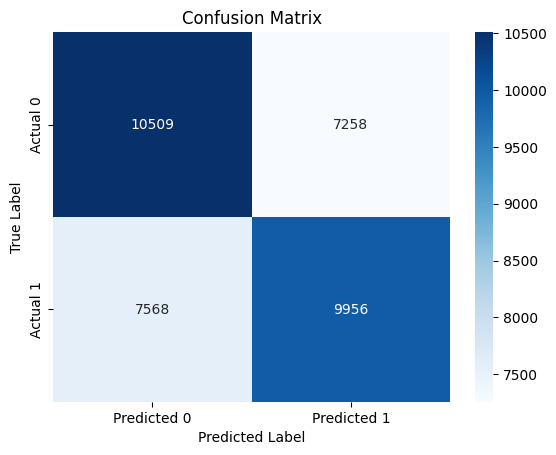

In [ ]:
predictions_pd = predictions.select(['prediction', 'Cancelled']).toPandas()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(predictions_pd['Cancelled'], predictions_pd['prediction'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report using scikit-learn
report = classification_report(predictions_pd['Cancelled'], predictions_pd['prediction'])

# Display the classification report
print("Classification Report:")
print(report)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:

from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

feature_columns =[
    'Origin_index', 'Dest_index','Distance', 'Month', 'DayOfWeek', 'DayofMonth', 'DepTimeBlk_index',
    'ArrTimeBlk_index', 'Airline_index', 'scaled_CRSDepTime_InMinutes',
    'Flight_Number_Marketing_Airline',
]

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data = assembler.transform(filtered_dataframe)

# Split the data into training and testing sets
(training_data, testing_data) = data.randomSplit([0.7, 0.3], seed=1234)

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol='features', labelCol='Cancelled', maxBins=400, maxDepth=16, impurity = 'entropy')

# Train the model
model = dt.fit(training_data)

# Make predictions on the testing data
predictions = model.transform(testing_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Cancelled', metricName='areaUnderROC')

Confusion Matrix:
[[18503  8019]
 [ 6473 19933]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72     26522
           1       0.71      0.75      0.73     26406

    accuracy                           0.73     52928
   macro avg       0.73      0.73      0.73     52928
weighted avg       0.73      0.73      0.73     52928



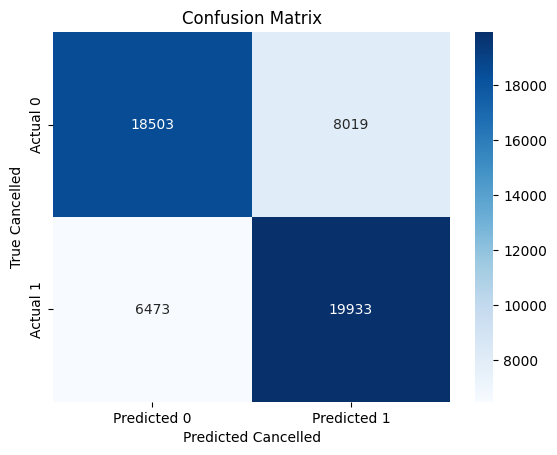

In [ ]:
predictions_pd = predictions.select(['prediction', 'Cancelled']).toPandas()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(predictions_pd['Cancelled'], predictions_pd['prediction'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report using scikit-learn
report = classification_report(predictions_pd['Cancelled'], predictions_pd['prediction'])

# Display the classification report
print("Classification Report:")
print(report)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Cancelled')
plt.ylabel('True Cancelled')
plt.title('Confusion Matrix')
plt.show()


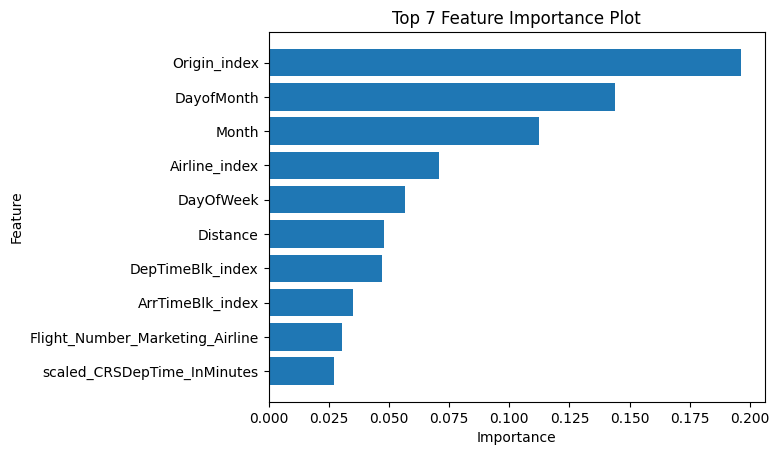

In [ ]:
# Extract feature importance from the trained model
feature_importance = model.featureImportances.toArray()

# Get indices of top N features based on importance, the bracket[], are the number of important value to plot
top_feature_indices = sorted(range(len(feature_importance)), key=lambda i: feature_importance[i], reverse=False)[:7]

# Get names and importance values of top N features
top_feature_names = [feature_columns[i] for i in top_feature_indices]
top_feature_values = [feature_importance[i] for i in top_feature_indices]

# Create a bar plot for the top N features
plt.barh(top_feature_names, top_feature_values)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 7 Feature Importance Plot")
plt.show()